In [1]:
# import tensorflow as tf
# import tensorflow.keras as kr
import nibabel as nib
import numpy as np
import os
from glob import glob
import matplotlib.pylab as plt
import pydicom as dicom
import multiprocessing as mp




155


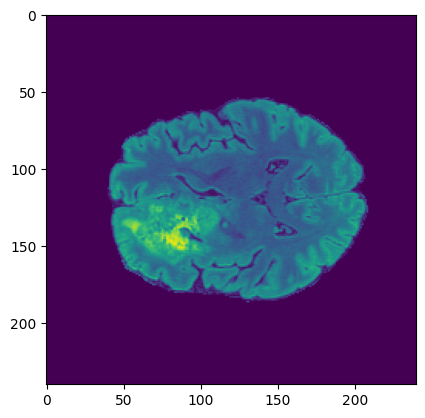

In [2]:
image = nib.load(r"/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_flair.nii.gz").get_fdata()
imag = image[:, :, image.shape[2] // 2]  
plt.imshow(image[:,:,77])
print(image.shape[2])

In [3]:
folder_path = [os.path.join(r"/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data", i) for i in os.listdir(r"/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data")]
imgs = []

for i in folder_path:
    imgs.append(glob(i+"/*"))
print("Done")
folder_path = folder_path[1:]
imgs = imgs[1:]
print(imgs[0])


In [ ]:
outputpath = []
inputpath = []
for j in imgs:
    for i in j:
        if "seg.nii.gz" in i.split("_"):
            outputpath.append(i)
for j in imgs:
    temppath = []
    for i in j:
        if "seg.nii.gz" not in i.split("_"):
            temppath.append(i)
    inputpath.append(temppath)

In [ ]:

import os, psutil
process = psutil.Process(os.getpid())
def prepoutput():
    index = 0
    outputimg = np.array((nib.load(outputpath[0]).get_fdata().astype(np.float32)[:, :, 75]))
    for i in range(1,len(outputpath)):
        index+=1
        print(index)
        print(outputpath[i])
        outputimg = np.dstack((outputimg,nib.load(outputpath[i]).get_fdata().astype(np.float32)[:, :, 75]),)
    outputimg = outputimg.transpose((2, 0, 1))
    return outputimg
outputimg = prepoutput()


1
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00002/BraTS2021_00002_seg.nii.gz
2
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00003/BraTS2021_00003_seg.nii.gz
3
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00005/BraTS2021_00005_seg.nii.gz
4
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00006/BraTS2021_00006_seg.nii.gz
5
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00008/BraTS2021_00008_seg.nii.gz
6
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00009/BraTS2021_00009_seg.nii.gz
7
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00011/BraTS2021_00011_seg.nii.gz
8
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00012/BraTS2021_00012_seg.nii.gz
9
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00014/BraTS2021_00014_seg.nii.gz
10
/mnt/d/Fabio/dee

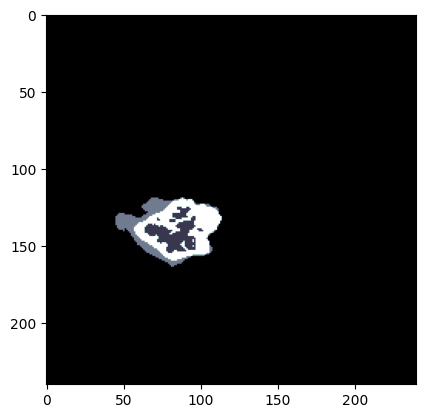

In [ ]:
plt.imshow(outputimg[0],cmap="bone")

In [ ]:
#testting the concentating of numpy
#kinda forgot
import numpy as np
x= np.random.rand(100,100)
y = np.random.rand(100,100)
x = np.expand_dims(x, axis=0)
y = np.expand_dims(y, axis=0)
z = np.concatenate((x,y),axis=0)
z.shape

(2, 100, 100)

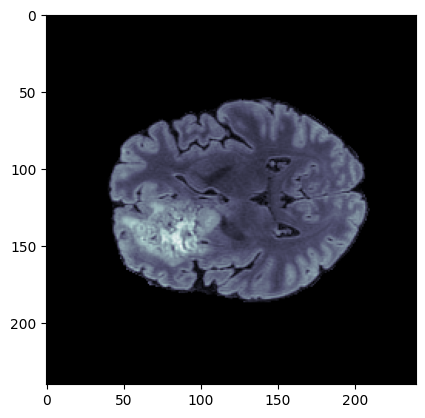

In [ ]:
#checking
plt.imshow(nib.load(inputpath[0][0]).get_fdata().astype(np.float32)[:, :, 75],cmap="bone")



In [ ]:

inputimg = nib.load(inputpath[0][0]).get_fdata().astype(np.float32)[:, :, 75]
for i in range(1,len(inputpath[0])):
    inputimg = np.dstack((inputimg,nib.load(inputpath[0][i]).get_fdata().astype(np.float32)[:, :, 75]))
inputimg = np.expand_dims(inputimg, axis=0)

for i in range(1,len(inputpath)):
    print(i)
    
    temp = nib.load(inputpath[i][0]).get_fdata().astype(np.float32)[:, :, 75]
    print("\t1")
    print(f"\t{inputpath[i][0]}")
    for channels in range(1,len(inputpath[i])):
        print(f"\t{channels+1}")
        print(f"\t{inputpath[i][channels]}")
        temp = np.dstack((temp,nib.load(inputpath[i][channels]).get_fdata().astype(np.float32)[:, :, 75]))
        
    temp = np.expand_dims(temp, axis=0)
    inputimg = np.concatenate((inputimg,temp), axis=0)
    print(inputimg.shape)

1
	1
	/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00002/BraTS2021_00002_flair.nii.gz
	2
	/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00002/BraTS2021_00002_t1.nii.gz
	3
	/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz
	4
	/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00002/BraTS2021_00002_t2.nii.gz
(2, 240, 240, 4)
2
	1
	/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00003/BraTS2021_00003_flair.nii.gz
	2
	/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00003/BraTS2021_00003_t1.nii.gz
	3
	/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00003/BraTS2021_00003_t1ce.nii.gz
	4
	/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00003/BraTS2021_00003_t2.nii.gz
(3, 240, 240, 4)
3
	1
	/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/Br

In [ ]:
print("inputimg",inputimg.shape)
print("outputimg",outputimg.shape)
inputimg = np.array(inputimg, dtype=np.float32)
outputimg = np.array(outputimg, dtype=np.float32)

inputimg (1251, 240, 240, 4)
outputimg (1251, 240, 240)


: 

In [ ]:
inputimg.shape[0] == outputimg.shape[0]

True

In [ ]:
1126+63
#train 1126
#eval 63
#test 61

1189

In [ ]:
#copy
x_train = inputimg[:1126].copy()
y_train = outputimg[:1126].copy()
x_train.shape[0] == y_train.shape[0]

True

In [ ]:
x_eval = inputimg[1126:1189].copy()
y_eval = outputimg[1126:1189].copy()
print(x_eval.shape, y_eval.shape)
print(x_eval.shape[0] == y_eval.shape[0])
x_test = inputimg[1189:].copy()
y_test = outputimg[1189:].copy()

print(x_test.shape, y_test.shape)
print(x_test.shape[0] == y_test.shape[0])


(63, 240, 240, 4) (63, 240, 240)
True
(62, 240, 240, 4) (62, 240, 240)
True


In [ ]:
#shuffle data
np.random.seed(0)

np.random.shuffle(x_train)
np.random.shuffle(y_train)

np.random.shuffle(x_eval)
np.random.shuffle(y_eval)

np.random.shuffle(x_test)
np.random.shuffle(y_test)


In [ ]:
import tensorflow as tf

import tensorflow.keras as kr
print(tf.config.list_physical_devices('GPU'))
print()
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9836551964599470319
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5833228288
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15669615171078036932
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2024-06-22 23:06:17.438356: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 23:06:17.446317: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 23:06:17.446406: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 23:06:17.462558: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 23:06:17.463141: I tensorflow/core/common_runtime/gpu/gpu

In [ ]:
inputimg[0].max()

12092.0

In [ ]:
p =  ((nib.load(inputpath[0][channels]).get_fdata().astype(np.float32)[:, :, 75]) >= 256)

print(((nib.load(inputpath[0][channels]).get_fdata().astype(np.float32)[:, :, 75]).max()))

2279.0


In [ ]:
inputimg[0].shape

(240, 240, 4)

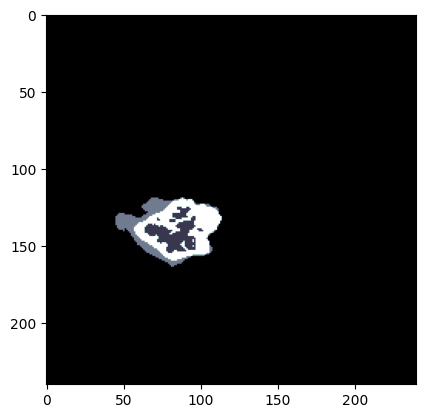

In [ ]:
plt.imshow((nib.load(outputpath[0]).get_fdata().astype(np.float32)[:, :, 75]),cmap = "bone")

In [ ]:
inputs = kr.Input((240,240,4))
conv1 = kr.layers.Conv2D(32, 3,2, padding='same')(inputs)
batch1 = kr.layers.BatchNormalization()(conv1)
act1 = kr.activations.relu(batch1)

conv2 = kr.layers.Conv2D(64,3,2,padding="same")(act1)
batch2 = kr.layers.BatchNormalization()(conv2)
act2 = kr.activations.relu(batch2)

conv3 = kr.layers.Conv2D(128,3,2,padding="same")(act2)
batch3 = kr.layers.BatchNormalization()(conv3)
act3 = kr.activations.relu(batch3)

conv4 = kr.layers.Conv2D(256,3,2,padding="same")(act3)
batch4 = kr.layers.BatchNormalization()(conv4)
act4 = kr.activations.relu(batch4)

conv5 = kr.layers.Conv2D(512,3,2,padding="same")(act4)
batch5 = kr.layers.BatchNormalization()(conv5)
act5 = kr.activations.relu(batch5)

conv6 = kr.layers.Conv2D(1024,3,2,padding="same")(act5)
batch6 = kr.layers.BatchNormalization()(conv6)
act6 = kr.activations.relu(batch6)

x = kr.layers.Conv2DTranspose(1024, 3, 2, padding="same")(act6)
x = kr.layers.BatchNormalization()(x)
x = kr.activations.relu(x)

x = kr.layers.Conv2DTranspose(512, 3, 2, padding="same")(x)
x = kr.layers.BatchNormalization()(x)
x = kr.activations.relu(x)

x = kr.layers.Conv2DTranspose(256, 3, 2, padding="same")(x)
x = kr.layers.BatchNormalization()(x)
x = kr.activations.relu(x)

x = kr.layers.Conv2DTranspose(128, 3, 2, padding="same")(x)
x = kr.layers.BatchNormalization()(x)
x = kr.activations.relu(x)

x = kr.layers.Conv2DTranspose(64, 3, 2, padding="same")(x)
x = kr.layers.BatchNormalization()(x)
x = kr.activations.relu(x)

x = kr.layers.Conv2DTranspose(32, 3, 2, padding="same")(x)
x = kr.layers.BatchNormalization()(x)
x = kr.activations.relu(x)
outputs = kr.layers.Conv2D(1, 3, activation="softmax", padding="same")(x)
model = kr.Model(inputs,outputs)
model.summary()



Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 240, 240, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 120, 120, 32)   │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_36 (ReLU)                 │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_37 (ReLU)                 │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_38 (ReLU)                 │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_39 (ReLU)                 │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_40 (ReLU)                 │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 4, 4, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_41 (ReLU)                 │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_18             │ (None, 8, 8, 1024)     │     9,438,208 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 8, 8, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │             

 Total params: 22,029,409 (84.04 MB)

 Trainable params: 22,021,345 (84.00 MB)

 Non-trainable params: 8,064 (31.50 KB)

In [ ]:
y_train = np.expand_dims(y_train,axis=3).shape
y_eval = np.expand_dims(y_eval, axis=3).shape
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
callbacks = [
    kr.callbacks.ModelCheckpoint("oxford_segmentation.keras",
   save_best_only=True)
 ]
model.fit(x_train, y_train,
            epochs=50,
            callbacks=callbacks,
            batch_size=64,
            validation_data=(x_eval, y_eval))

AxisError: axis 3 is out of bounds for array of dimension 2

In [ ]:
np.expand_dims(y_train,axis=3).shape

(1126, 240, 240, 1)

In [ ]:
y_train.shape

AttributeError: 'tuple' object has no attribute 'shape'